<a href="https://colab.research.google.com/github/Madhumita1110/PySpark_ELT_pipeline/blob/main/A2_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree**

**Dataset**

The Lung Cancer Dataset is taken from Kaggle datasets repository. It contains 15 input attributes and an output variable named as LUNG_CANCER which is our class label. It is a binary classification problem. There are total 309 instances and there are no missing values in the dataset. The attributes are mainly discrete in nature and the file format is csv.

**What is a Decision Tree?**

Decision tree is a supervised machine learning technique used for classification and regression tasks. It works very well for
categorical variables as well as numerical variables. 

DT is
a graphical representation of all possible outcomes from a
decision based on some set of rules. Root of the tree is the
root node which starts with some question or hypothesis,
followed by decision node where the problem splits up
into branches of solutions i.e., a choice of decision to be
made and the leaf node which denotes the final decision. Each root node serves as a question which help further
splitting the question until a conclusion is arrived.

**Hypothesis in our case?**

To find out whether a person has lung cancer or not.

In [3]:
#import important libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files
  

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['survey lung cancer.csv']))
df.head()

Saving survey lung cancer.csv to survey lung cancer.csv


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

**Data Encoding**

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Encoding categorical data is a process of converting labels into integer format so that the data with numerical values can be provided to the models to give improved predictions. Our dataset contains 2 categorical variables which are not in numeric form, we will map them into numbers using LabelEncoder from scikit learn library. 

In [ ]:
#label encoding of categorical variables

from sklearn.preprocessing import LabelEncoder

col = ['GENDER', 'LUNG_CANCER']

# Encode labels of columns

df[col] = df[col].apply(LabelEncoder().fit_transform)

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
#define features

features = list(df.columns[:15]) # we have  15 input variables which are our features.
features

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN']

Define dependent output variable 'LUNG_CANCER' as y and all independent feature variables as X.

In [ ]:
y = df["LUNG_CANCER"] #dependent variable y
X = df[features] #independent variables X

**Train-Test Split**

We will use train-test split model from scikit learn library to separate our dataset into train and test data. We will train 70% of our data using Decision tree model and then test the accuracy of our model on test data which is 30% of the dataset.

In [ ]:
#divide the dataset into train and test data in 70-30 ratio and fit the Decision tree model on train data.

from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn.metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train) #fit classifier on train set

pred_train = clf.predict(X_train)  # make predictions on train set
pred_test = clf.predict(X_test)  # make predictions on test set

# compute accuracy score
acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)
acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)

# print accuracy score
print(f'Accuracy score of train data is: {acc_train*100: .2f}%')
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')


Accuracy score of train data is:  99.54%
Accuracy score of test data is:  91.40%


We got a over-fitted model. However, our accuracy for test data isn't very much affected with the overfitting but still we will discuss it.

Decision Tree is very prone to overfitting where we get very good accuracy 
on train data, but the model doesn’t perform good when it sees 
unseen data. So we use Pre-pruning, post-pruning and ensembling techniques to reduce overfitting of data. We will discuss about pre-pruning and ensembling techniques here.

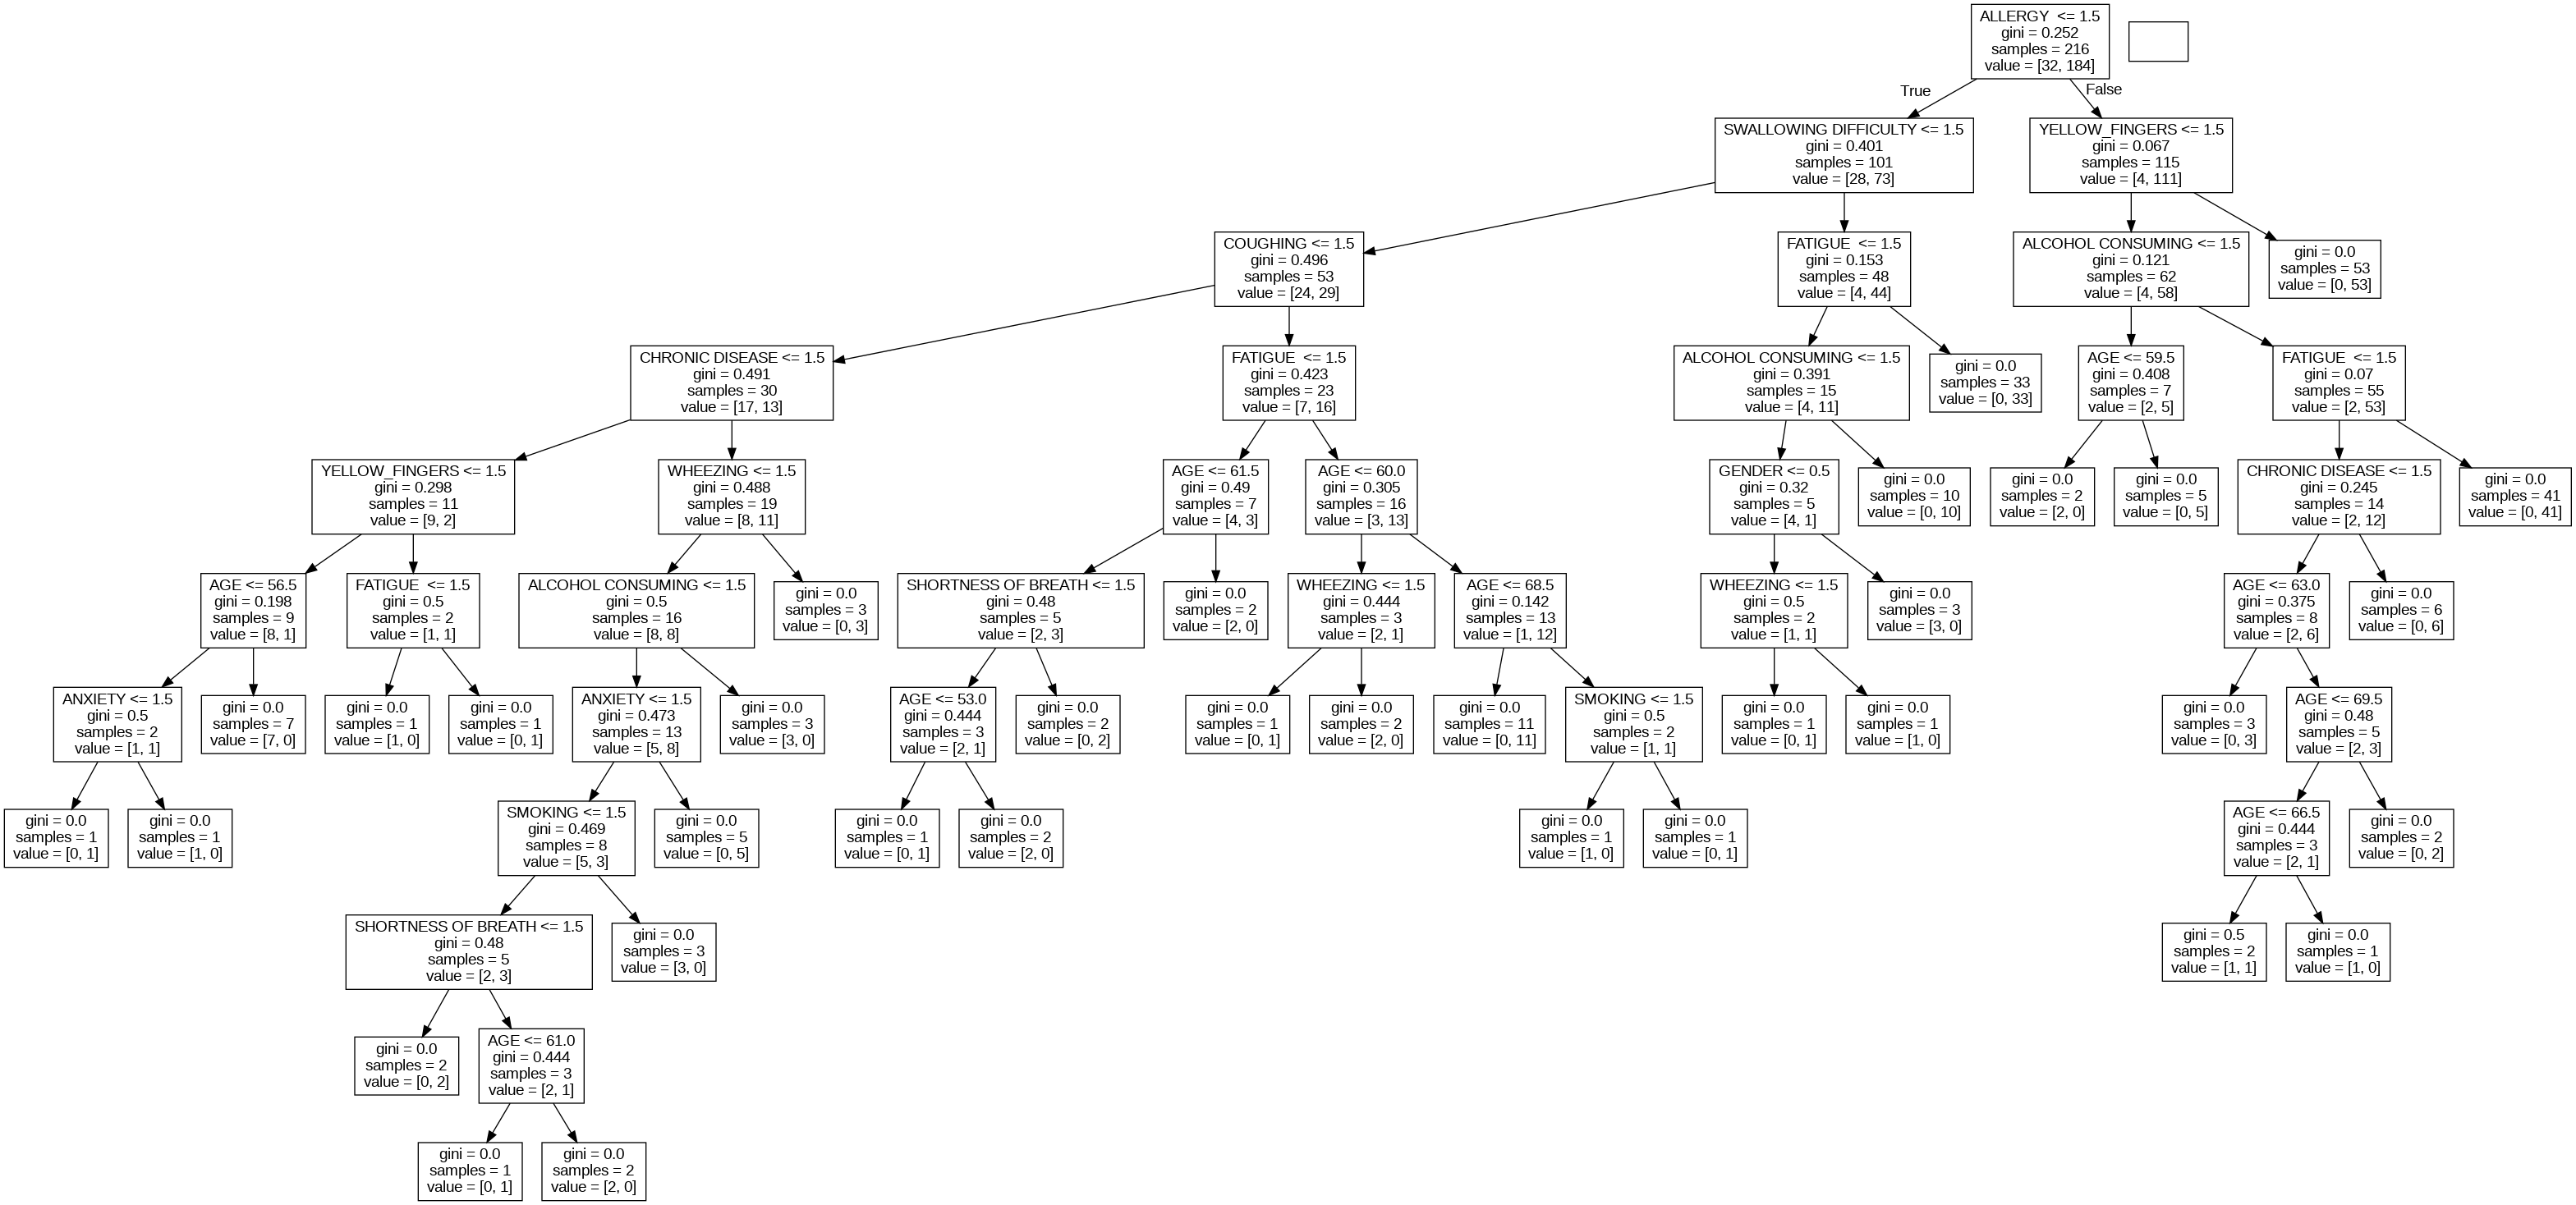

In [ ]:
#see how our entire tree looks like

from IPython.display import Image
from six import StringIO  
import pydot

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png()) 

**Pre-pruning of Decision Trees**

Pre-pruning is a method of 
preventing overfitting of our model at an early stage by 
stopping the tree building process before it starts producing 
leaves with very small samples. Pruning reduces the size of the tree by 
removing the parts of the tree that are less informative about 
our prediction and do not contribute to classify our instances 
properly. We prevent overfitting through pre-pruning by presetting few hyperparameters like maximum depth of the tree, 
minimum sample split, minimum sample leaves, maximum features etc. This 
reduces overfitting thereby increasing performance of our 
model.

In [ ]:
#pre-pruning decision tree by setting hyperparameters

clf = tree.DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=9)
clf = clf.fit(X_train,y_train)   #fit classifier to training set

pred_train = clf.predict(X_train)  # make predictions on train set
pred_test = clf.predict(X_test)  # make predictions on test set

# compute accuracy score
acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)
acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)

# print accuracy score
print(f'Accuracy score of train data is: {acc_train*100: .2f}%')
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')

Accuracy score of train data is:  90.74%
Accuracy score of test data is:  94.62%


We significantly reduced overfitting by tuning our decision tree by setting few hyperparameters before start of building of our tree. This helped us improve our prediction.

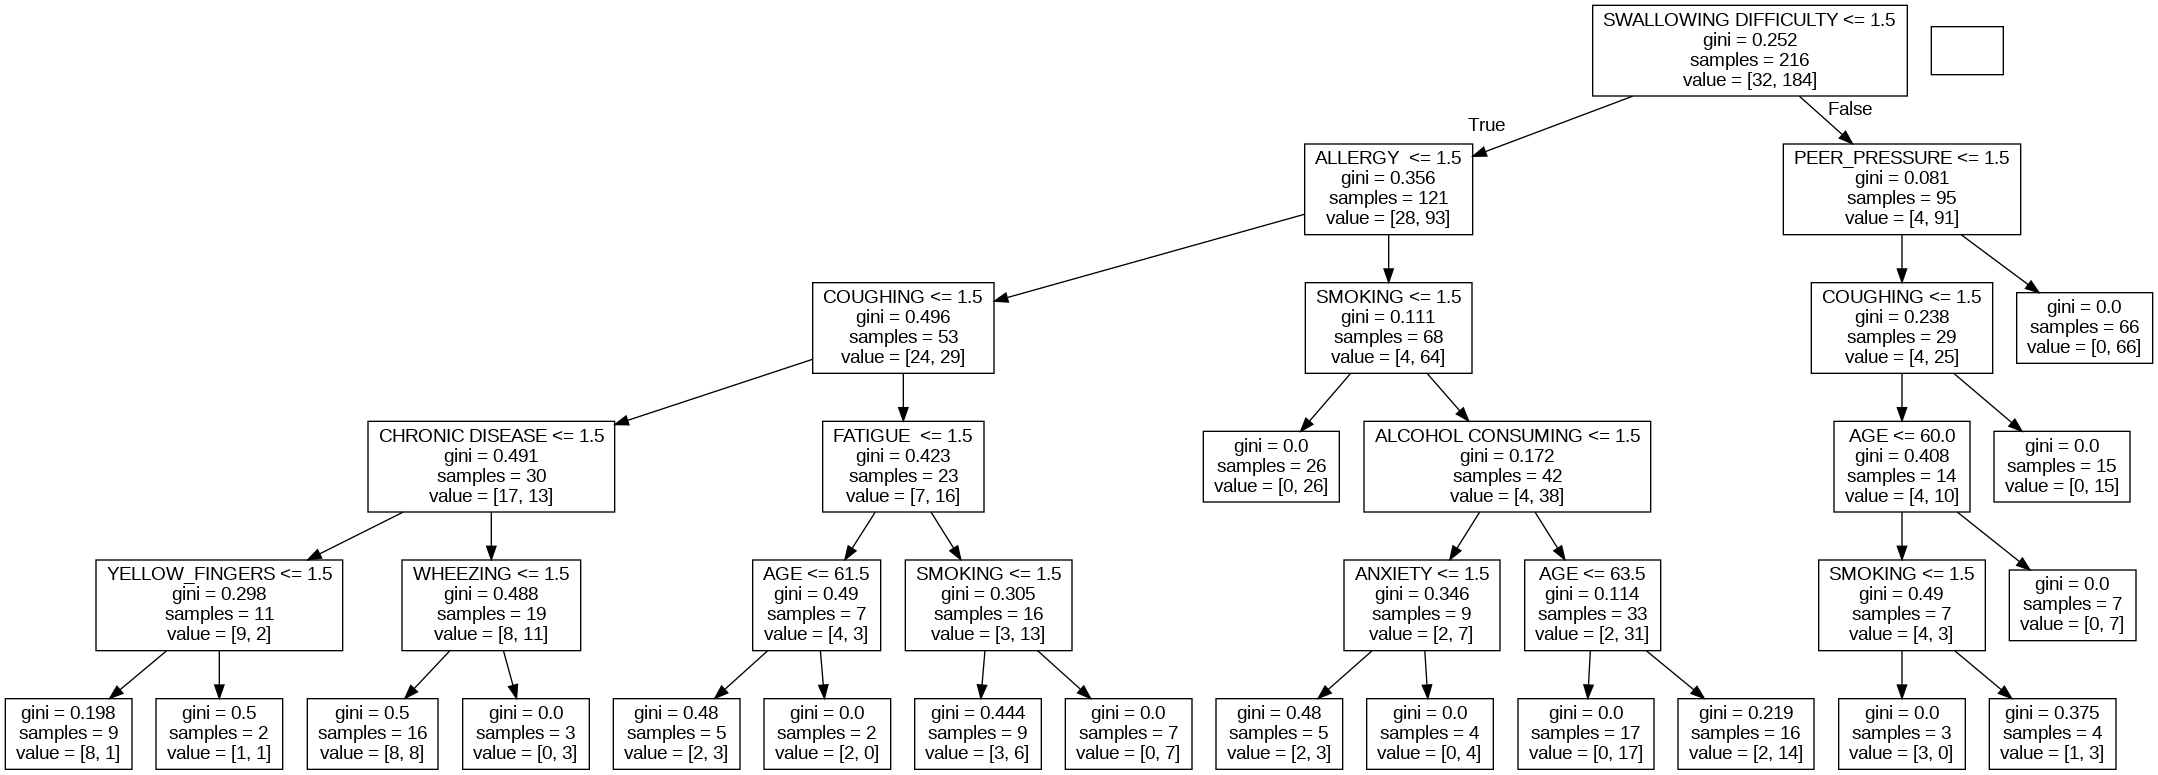

In [ ]:
#tree after pre-pruning

from IPython.display import Image
from six import StringIO  
import pydot

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())  

**Ensembling (using Random Forests)**

Another efficient method to reduce 
overfitting in decision trees is by using Random Forest. Random forest is an 
ensemble technique where the model reach to its decision by 
taking a majority vote from the collection of n number of 
decision trees. Thus, Random Forest avoids overfitting by 
using multiple decision trees. More trees perform better and 
give a stable result. We can set hyperparameters to fix the total 
number of trees, the size of each tree, number of sample splits 
etc. to achieve our desired accuracy.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 20, max_depth=5,random_state=42)
clf.fit(X_train,y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)
print(f'Accuracy score of train data is: {acc_train*100: .2f}%')

acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')


Accuracy score of train data is:  94.44%
Accuracy score of test data is:  95.70%


So, ensembling by Random Forests also reduced overfitting with an increase in accuracy.